由第一部分的数据处理可知，price项数据不全，只有120975项数据，一共有129971项，缺项，以对其处理为例

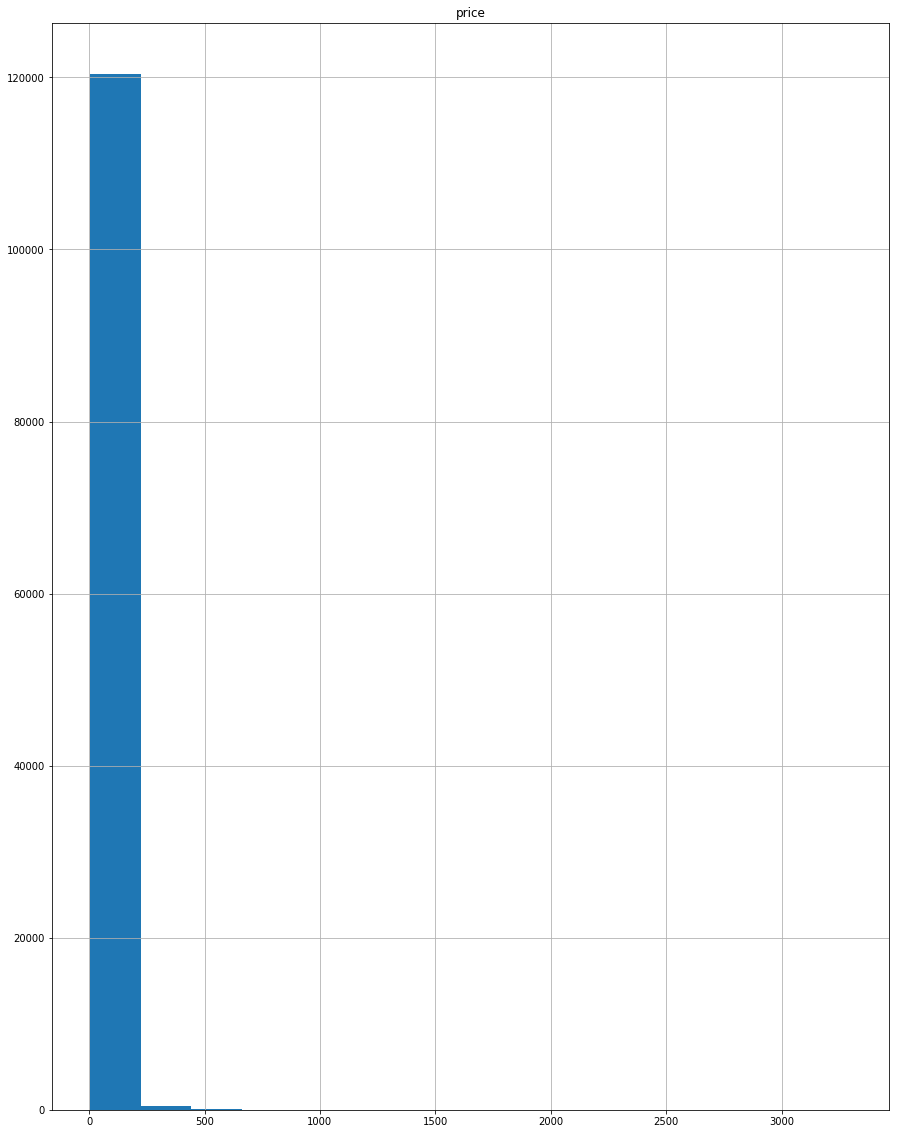

In [2]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
def load_data():
    csv_path = "winemag-data-130k-v2.csv"
    return pd.read_csv(csv_path)
data = load_data()
data.hist(column="price",bins=15,figsize=(15,20))
plt.show()

In [ ]:
初次处理发现其分布较为集中，故对其进行离散处理，同时限制最大数值为1000

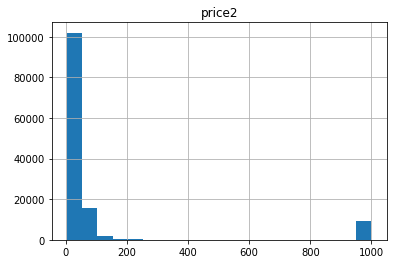

In [3]:
data["price2"] = np.ceil(data["price"] )
data["price2"].where(data["price2"] < 1000, 1000, inplace=True)
data.hist(column="price2", bins=20)
plt.show()

删除对应缺项的数据

In [4]:
data2=data.dropna(subset=["price"]) 
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120975 entries, 1 to 129970
Data columns (total 15 columns):
Unnamed: 0               120975 non-null int64
country                  120916 non-null object
description              120975 non-null object
designation              86196 non-null object
points                   120975 non-null int64
price                    120975 non-null float64
province                 120916 non-null object
region_1                 101400 non-null object
region_2                 50292 non-null object
taster_name              96479 non-null object
taster_twitter_handle    91559 non-null object
title                    120975 non-null object
variety                  120974 non-null object
winery                   120975 non-null object
price2                   120975 non-null float64
dtypes: float64(2), int64(2), object(11)
memory usage: 14.8+ MB


用众数进行补全

In [5]:
data2=data.copy()
mode = data2["price"].mode()[0]
data2["price"].fillna(mode,inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 15 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    129971 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
price2                   129971 non-null float64
dtypes: float64(2), int64(2), object(11)
memory usage: 14.9+ MB


此时所有的distance_from_home都已经用众数补充，观察其分布情况

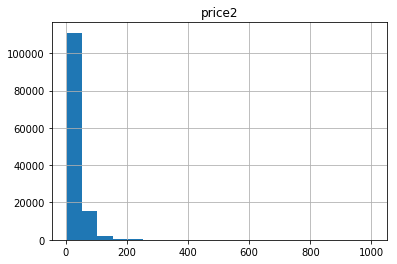

In [8]:
data2["price2"]=np.ceil(data2["price"])
data2["price2"].where(data2["price2"]<1000,1000,inplace=True)
data2.hist(column="price2",bins=20)
plt.show()